In [8]:
!pip install torch torchvision


[notice] A new release of pip is available: 23.0 -> 23.2
[notice] To update, run: pip install --upgrade pip


In [9]:
!pip install matplotlib


[notice] A new release of pip is available: 23.0 -> 23.2
[notice] To update, run: pip install --upgrade pip


In [14]:
import torch
from torch import nn
import numpy as np
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [11]:
train_data = datasets.FashionMNIST(root="data", train=True, transform=ToTensor(), download=True)

In [12]:
test_data = datasets.FashionMNIST("data", train=False, download=True, transform=ToTensor())

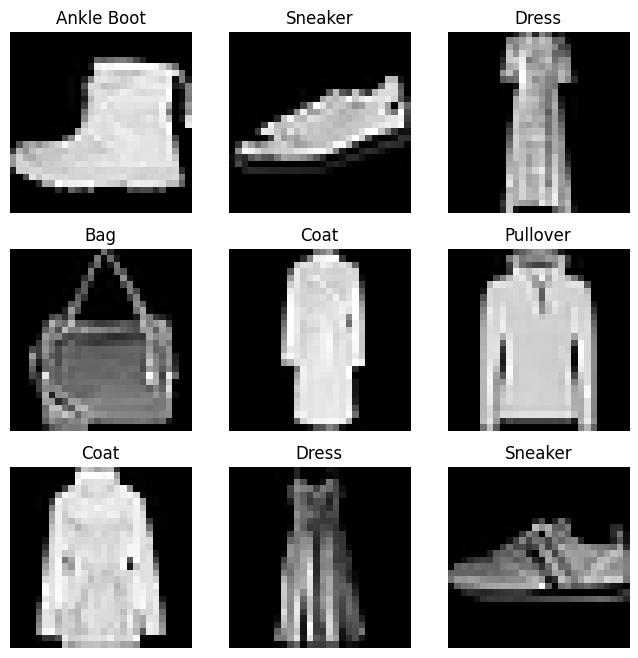

In [13]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(size=(1, ), high=len(train_data)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return x